<a href="https://colab.research.google.com/github/Bonjiang/SBU_athletics_SQL/blob/main/SBU_Athletics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 22.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector

## Show tables

In [ ]:
# Connect to database

conn = mysql.connector.connect(
    user='student_athletics',
    password='Ahi2024!!',
    host='shtm-fallprev.mysql.database.azure.com',
    database='sbu_athletics'
)
# Create cursor
cursor = conn.cursor()

table_name = 'hawkins-20240702'
query = f'SELECT * FROM `{table_name}`'
cursor.execute(query)

rows = cursor.fetchall()

column_names = [i[0] for i in cursor.description]
print(column_names)

for row in rows:
    print(row)

Streaming output truncated to the last 5000 lines.
(None, None, 'iyYWhMetVsDkYm3kk22u', 'Tyler Knoop', '9fx02UCTpwizD12c5lxP', 1719836259, 'Propulsive Phase(s)', '0.219')
(None, None, 'iyYWhMetVsDkYm3kk22u', 'Tyler Knoop', '9fx02UCTpwizD12c5lxP', 1719836259, 'Peak Relative Braking Force(%)', '266.2427')
(None, None, 'iyYWhMetVsDkYm3kk22u', 'Tyler Knoop', '9fx02UCTpwizD12c5lxP', 1719836259, 'Impulse Ratio', '2.2827')
(None, None, 'iyYWhMetVsDkYm3kk22u', 'Tyler Knoop', '9fx02UCTpwizD12c5lxP', 1719836259, 'Positive Impulse(N.s)', '682.388')
(None, None, 'iyYWhMetVsDkYm3kk22u', 'Tyler Knoop', '9fx02UCTpwizD12c5lxP', 1719836259, 'Countermovement Depth(m)', '-0.301')
(None, None, 'iyYWhMetVsDkYm3kk22u', 'Tyler Knoop', '9fx02UCTpwizD12c5lxP', 1719836259, 'Left Force at Peak Propulsive Force(N)', '1230')
(None, None, 'iyYWhMetVsDkYm3kk22u', 'Tyler Knoop', '9fx02UCTpwizD12c5lxP', 1719836259, 'Jump Height(m)', '0.5156')
(None, None, 'iyYWhMetVsDkYm3kk22u', 'Tyler Knoop', '9fx02UCTpwizD12c5lxP', 

## Excluding null sbuid values

In [ ]:
table_name = 'hawkins-20240702'
query = f'SELECT * FROM `{table_name}` WHERE `sbuid` IS NOT NULL'
cursor.execute(query)

rows = cursor.fetchall()

column_names = [i[0] for i in cursor.description]
print(column_names)

for row in rows:
    print(row)


['sbuid', 'sbu_sport', 'playerId', 'playerName', 'id', 'timestamp', 'metric', 'value']
(115966992.0, 'Football', 'w2fVaX6vqWOQHOzHydYr', 'Charles Allen', 'ye4ZAuNBmE1HEgkYJflY', 1719835492, 'Right Avg. Propulsive Force(N)', '1390.7273')
(115966992.0, 'Football', 'w2fVaX6vqWOQHOzHydYr', 'Charles Allen', 'ye4ZAuNBmE1HEgkYJflY', 1719835492, 'Relative Propulsive Net Impulse(N.s/kg)', '2.2764')
(115966992.0, 'Football', 'w2fVaX6vqWOQHOzHydYr', 'Charles Allen', 'ye4ZAuNBmE1HEgkYJflY', 1719835492, 'Propulsive Phase(s)', '0.242')
(115966992.0, 'Football', 'w2fVaX6vqWOQHOzHydYr', 'Charles Allen', 'ye4ZAuNBmE1HEgkYJflY', 1719835492, 'Peak Relative Braking Force(%)', '259.3147')
(115966992.0, 'Football', 'w2fVaX6vqWOQHOzHydYr', 'Charles Allen', 'ye4ZAuNBmE1HEgkYJflY', 1719835492, 'Impulse Ratio', '1.6394')
(115966992.0, 'Football', 'w2fVaX6vqWOQHOzHydYr', 'Charles Allen', 'ye4ZAuNBmE1HEgkYJflY', 1719835492, 'Positive Impulse(N.s)', '1089.5875')
(115966992.0, 'Football', 'w2fVaX6vqWOQHOzHydYr', 'C

## Different Sport types

In [ ]:
table_name = 'hawkins-20240702'
query = f'SELECT COUNT(DISTINCT `sbu_sport`) FROM `{table_name}`'
cursor.execute(query)

num_sports = cursor.fetchone()[0]
print(f"Number of unique sports: {num_sports}")


Number of unique sports: 6


In [ ]:
table_name = 'hawkins-20240702'
query = f'SELECT DISTINCT `sbu_sport` FROM `{table_name}`'
cursor.execute(query)

sports = cursor.fetchall()
sports_list = [sport[0] for sport in sports]
print("Sports:", sports_list)


Sports: ['Football', None, 'Track and Field', 'Mens Lax', 'Womens Volleyball', 'Mens Basketball', 'Baseball']


## Focusing only on Jump Height(m)

In [ ]:
import mysql.connector

# Establishing a connection to the database
conn = mysql.connector.connect(
    user='student_athletics',
    password='Ahi2024!!',
    host='shtm-fallprev.mysql.database.azure.com',
    database='sbu_athletics'
)

# Create a cursor object using the connection
cursor = conn.cursor()

table_name = 'hawkins-20240702'

try:
    # Construct the query to fetch specific metrics
    query = f"""
        SELECT *
        FROM `{table_name}`
        WHERE metric = 'Jump Height(m)'
        AND sbu_sport = 'Football'
    """

    # Execute the query
    cursor.execute(query)

    # Fetch all rows
    results = cursor.fetchall()

    # Display the results
    print("sbuid\tsbu_sport\tplayerId\tplayerName\tid\ttimestamp\tmetric\tvalue")
    for row in results:
        print("\t".join(map(str, row)))

except mysql.connector.Error as err:
    print(f"Error: {err}")

finally:
    # Close cursor and connection
    cursor.close()
    conn.close()


sbuid	sbu_sport	playerId	playerName	id	timestamp	metric	value
115966992.0	Football	w2fVaX6vqWOQHOzHydYr	Charles Allen	ye4ZAuNBmE1HEgkYJflY	1719835492	Jump Height(m)	0.2619
115093995.0	Football	qYtVIVMUhm9GfRAdNFYe	Johnny Martin	OXNAPyo9kanaM7t3vbal	1719835578	Jump Height(m)	0.5438
115909438.0	Football	9SPWhvI12KOXpXiU5POz	Spencer Biscoe	KaAo8hqJ3mMY7vBd2SW7	1719835746	Jump Height(m)	0.3183
116196314.0	Football	iFs5QFFqt6EKAEw9O7OM	Alex Menghi	ugG5gK6Wgy0TmuWXsBVy	1719835766	Jump Height(m)	0.3952
114233532.0	Football	clWT4SXIFSIe8VMWr8TJ	Jack LaParie Jr.	i6GNCixs6yjtTpRVMZQD	1719835803	Jump Height(m)	0.4826
115698824.0	Football	YkJBZwK8UYeIgRYIAjOW	Rahmon Hart	rIkujQtnVuFNtHl25Kdo	1719835889	Jump Height(m)	0.428
115568435.0	Football	7i2QlUpCkfNI0ajBBbfM	Paul Ronga	OkeWg5Z7oYLW44YqMpWI	1719835954	Jump Height(m)	0.4539
115273351.0	Football	fDWy2zK2kjNC2vIDY8PF	Jayce Freeman	sTi22KcsEe13Grf5fpVz	1719836036	Jump Height(m)	0.4669
115938111.0	Football	KEA6oHSM9q70FWmjVUyk	Anthony Johnson	QuGR

## Average Jump Height(m) for each sport

In [ ]:
import mysql.connector

# Establishing a connection to your database
conn = mysql.connector.connect(
    user='student_athletics',
    password='Ahi2024!!',
    host='shtm-fallprev.mysql.database.azure.com',
    database='sbu_athletics'
)

# Create a cursor object using the connection
cursor = conn.cursor()

# Define the table name
table_name = 'hawkins-20240702'

try:
    # Construct the query to fetch average Jump Height(m) for each sport
    query = f"""
        SELECT sbu_sport, AVG(CAST(value AS DECIMAL(10, 4))) AS average_jump_height
        FROM `{table_name}`
        WHERE metric = 'Jump Height(m)'
        GROUP BY sbu_sport
    """

    # Execute the query
    cursor.execute(query)

    # Fetch all rows
    results = cursor.fetchall()

    # Display the results
    print("sbu_sport\taverage_jump_height")
    for row in results:
        print(f"{row[0]}\t{row[1]}")

except mysql.connector.Error as err:
    print(f"Error: {err}")

finally:
    # Close cursor and connection
    cursor.close()
    conn.close()


sbu_sport	average_jump_height
Football	0.44492245
None	0.42282000
Track and Field	0.39450000
Mens Lax	0.34590000
Womens Volleyball	0.52630000
Mens Basketball	0.41630000
Baseball	0.44580000


## Analysis

*   Highest Average Jump Height(m):Womens Volleyball
*   Lowest Average Jump Height(m): Mens Lax

Further Analysis Considerations: indoor vs outdoor sport/practice, player demographics, ect.

## Visualization

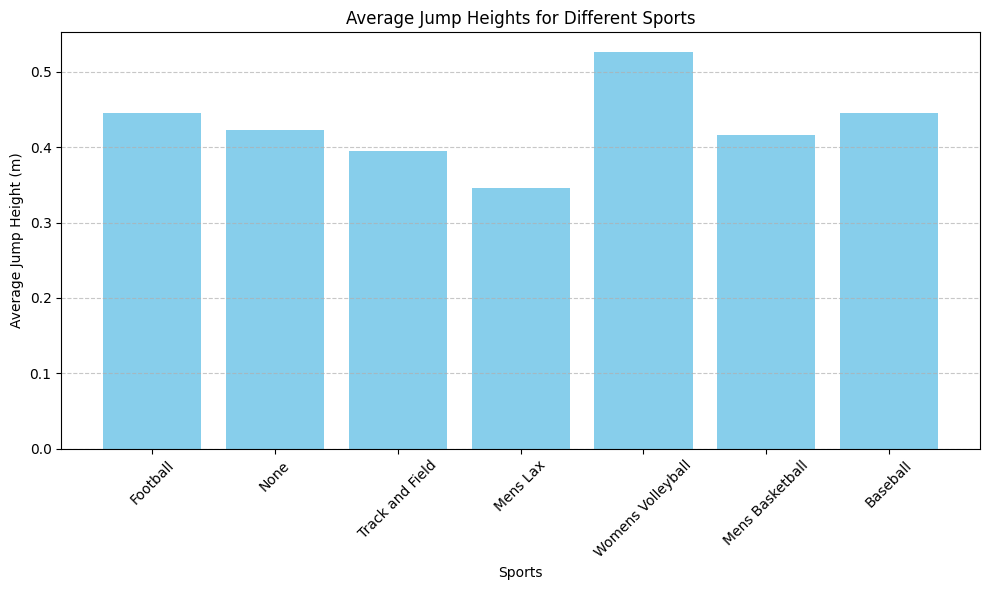

In [ ]:
sports = ['Football', 'None', 'Track and Field', 'Mens Lax', 'Womens Volleyball', 'Mens Basketball', 'Baseball']
average_jump_heights = [0.44492245, 0.42282000, 0.39450000, 0.34590000, 0.52630000, 0.41630000, 0.44580000]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sports, average_jump_heights, color='skyblue')
plt.xlabel('Sports')
plt.ylabel('Average Jump Height (m)')
plt.title('Average Jump Heights for Different Sports')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()
